In [21]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
from scipy.optimize import newton

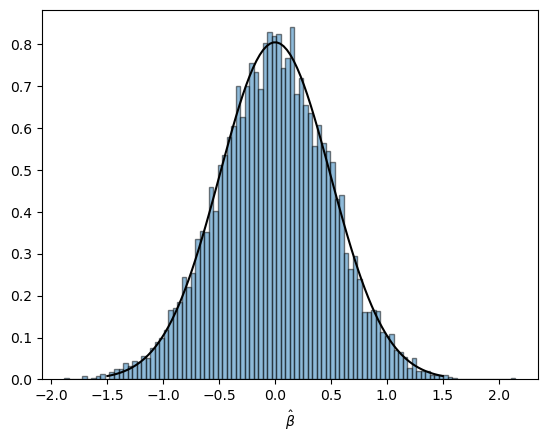

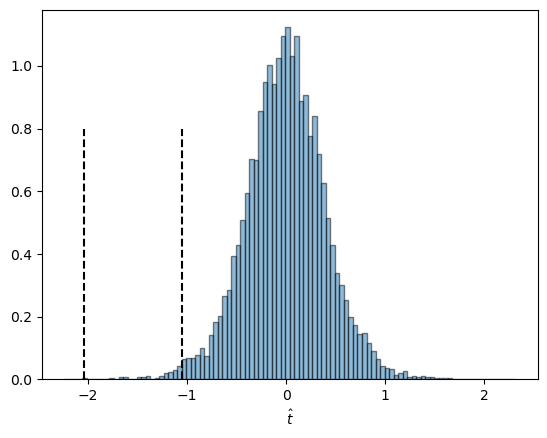

In [66]:
rng = np.random.default_rng(seed=1234)

def plot_func(f, xmin, xmax, n=100, **kwargs):
    x = np.linspace(xmin, xmax, n)
    y = f(x)
    plt.plot(x, y, **kwargs)

def S2(x):
    xstar = x - np.mean(x)
    return np.sum(xstar**2)

# Generate data 
n_data = 10
n_sims = 10000
sigma = 1.0
x = np.linspace(-1.0, 1.0, n_data)
eps = rng.normal(0, sigma, size=(n_sims, n_data))

# Initialize place to store models 
models = []
OLS_betas = []
predictions = np.zeros((n_sims, n_data))

for i in range(n_sims):
    Y = eps[i, :]

    # Fit a linear model
    X = sm.add_constant(x)
    model = sm.OLS(Y, X).fit()
    models.append(model)
    OLS_betas.append(model.params[1])
    
    predictions[i, :] = model.predict(X)

hat_sigma = np.sqrt(np.var(predictions - eps, ddof=1, axis=1))
t_stats = np.array(OLS_betas) / hat_sigma * np.sqrt(np.var(x, ddof=1))

# Calculate t-statistics

theoretical_var_beta = sigma**2 / S2(x)
theoretical_std_beta = np.sqrt(theoretical_var_beta)

# Calculate t-test threshold for a signifance of 0.05
F_cdf = lambda t : norm.cdf(t, loc=0, scale=theoretical_std_beta)
g = lambda t : 1 - (F_cdf(t) - F_cdf(-t))
newton(lambda t : g(t) - 0.05, x0=0.5)

# Plot histogram of obtained betas, theoretical distribution, t-values
plt.figure()
plt.hist(OLS_betas, 100, density=True, alpha=0.5, edgecolor='k')
plot_func(lambda t : norm.pdf(t, loc=0, scale=theoretical_std_beta), xmin=-1.5, xmax=1.5, c='k')
plt.xlabel('$\\hat{\\beta}$')
plt.show()

# Plot t-statistics
plt.figure()
plt.hist(t_stats, 100, density=True, alpha=0.5, edgecolor='k')
plt.xlabel('$\\hat{t}$')
p = np.percentile(t_stats, [0.05/2, 1-0.05/2])
plt.vlines(p, 0, 0.8, colors='k', linestyles='dashed')
plt.show()

In [116]:
models[-1].t_test()

TypeError: LikelihoodModelResults.t_test() missing 1 required positional argument: 'r_matrix'

Area = 0.9470697581522474


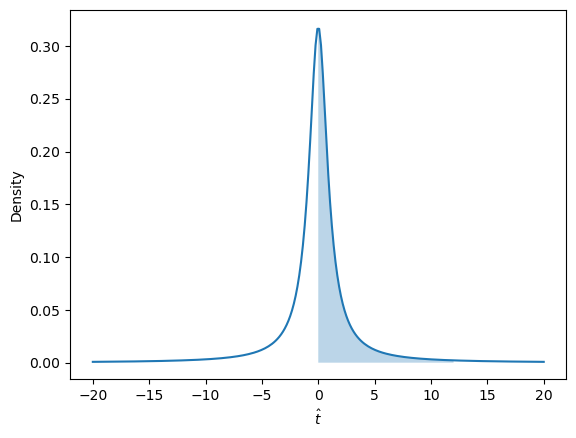

np.float64(2.228138852054035)

In [113]:
from scipy.stats import t
from functools import partial
from scipy.integrate import simpson, trapezoid

def t_cdf(x, df=n_data): 
    return t(df=df).cdf(x)
def t_pdf(x, df=n_data): 
    return t(df=df).pdf(x)

def calc_area(x):
    df = 10
    x_between = np.linspace(0.0, x, 100000)
    y_between = t_pdf(x_between, df=df)
    area = trapezoid(y_between, x_between, dx = np.diff(x_between))
    return area

def find_one_sided_sig_val(p):
    return newton(lambda x : 2 * calc_area(x) - p, 5.0)

def plot_t_pdf(df, xmax=12):

    x = np.linspace(-20, 20, 250)
    y = t_pdf(x, df=df)
    x_between = np.linspace(0.0, xmax, 100)
    y_between = t_pdf(x_between, df=df)
    area = trapezoid(y_between, x_between, dx = np.diff(x_between))
    print(f"Area = {2 * area}")

    plt.figure()
    plt.plot(x, y)
    plt.fill_between(x_between, 0.0, y_between, alpha=0.3)
    plt.xlabel('$\\hat{t}$')
    plt.ylabel('Density')
    plt.show()

plot_t_pdf(1)
find_one_sided_sig_val(0.95)